In [1]:
import pandas as pd 
import numpy as np
import tensorly as tl
import plotly.express as px
import matplotlib.pyplot as plt 
from tensorly.decomposition import CP,tucker, parafac, non_negative_tucker
from datetime import timedelta, date
from statsmodels.tsa.stattools import acf, pacf

In [2]:
df_FR = pd.read_excel('FINANCIAL_RATIOS_NEW.xlsx', index_col =[0], skiprows=[1])

In [3]:
price = None
FR_dic = {}
FR_list = ['PE', 'PX_LAST', 'PS','PB']
n = 0 
NUMBER_OF_STOCKS = 220

log_returns = None 

COLUMN_NAMES = None
for i,name in enumerate(FR_list) : 
    FR_dic[name] = (df_FR.iloc[:,n:n+NUMBER_OF_STOCKS]
                    .set_index(df_FR.index)
                    )
    if i == 0 : 
        COLUMN_NAMES = FR_dic['PE'].columns

    FR_dic[name].columns = COLUMN_NAMES
    if name not in ['PX_LAST', 'MCAP'] : 
        FR_dic[name] = FR_dic[name].diff()


    if name in ['PX_LAST'] :
        price = FR_dic['PX_LAST']
        FR_dic[name] = np.log(FR_dic[name])
        FR_dic[name] = FR_dic[name].diff()
        
    

     
    FR_dic[name] = FR_dic[name][1:]
    if name in ['PX_LAST'] :
        log_returns = FR_dic[name]
    n += NUMBER_OF_STOCKS + 2


for i,name in enumerate(FR_list) : 
    FR_dic[name] = FR_dic[name]-FR_dic[name].rolling(window=15,min_periods=1).mean() / FR_dic[name].rolling(window=15,min_periods=1).std()
    FR_dic[name] = FR_dic[name][1:]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    FR_dic['PE'].replace([np.inf, -np.inf], np.nan, inplace=True)
    FR_dic['PB'].replace([np.inf, -np.inf], np.nan, inplace=True)
    FR_dic['PS'].replace([np.inf, -np.inf], np.nan, inplace=True)

    drop_column_names = FR_dic['PE'].columns[FR_dic['PE'].isna().any()]
    drop_column_names_2 = FR_dic['PS'].columns[FR_dic['PS'].isna().any()]
    drop_column_names_3 = FR_dic['PB'].columns[FR_dic['PB'].isna().any()]
    drop_column_names_4 = FR_dic['PE'].columns[FR_dic['PE'].le(-2000).any()]
    remain_column_names = FR_dic['PE'].columns[~FR_dic['PE'].isna().any()]


for i,name in enumerate(FR_list) : 
    # FR_dic[name].columns = COLUMN_NAMES

    # FR_dic[name] = FR_dic[name][remain_column_names]
    FR_dic[name] = FR_dic[name].drop(drop_column_names, axis=1)

    FR_dic[name] = FR_dic[name].drop(drop_column_names_2, axis=1, errors='ignore')
    FR_dic[name] = FR_dic[name].drop(drop_column_names_3, axis=1, errors='ignore')
    FR_dic[name] = FR_dic[name].drop(drop_column_names_4, axis=1, errors='ignore')


    # FR_dic[name] = FR_dic[name].drop(['UFPT US Equity', 'CWST US Equity', 'MSTR US Equity'],axis=1)
    # FR_dic[name] = FR_dic[name].drop(['VIVO US Equity', 'PZZA US Equity', 'PENN US Equity', 'SBGI US Equity','CLWT US Equity', 'ORCL US Equity', 'BA US Equity','ROCK US Equity'],axis=1)

final_column_names = FR_dic['PE'].columns
# for i,name in enumerate(FR_list) : 

#         print(name)
#         FR_dic[name].replace([np.inf, -np.inf], np.nan, inplace=True)
#         drop_column_names = FR_dic[name].columns[FR_dic[name].isna().any()]
#         remain_column_names = FR_dic[name].columns[~FR_dic[name].isna().any()]
#         print(drop_column_names)


FR_index = FR_dic['PE'].index


# FR_dic['PB'].to_csv('PB_mean_centered.csv')

# for key, val in FR_dic.items() : 

#     FR_dic[key] = FR_dic[key][1:]

In [4]:
FR_dic['PE'].shape

# print(FR_dic['PX_LAST'])

# print(log_returns)

(810, 125)

In [5]:
df_TI = pd.read_excel('TECH_NEW.xlsx', skiprows=[0])

TI_dic = {}
TI_list = ['BB_PERCENT', 'HURST', 'MOM', 'ROC','RSI','WLPR']
n = 1

for _, TI in enumerate(TI_list) : 
    filter_col = [col for col in df_TI if col.startswith(TI)]
    TI_dic[TI] = (df_TI[filter_col]
                 .set_axis(COLUMN_NAMES, axis=1)
                 .set_index(df_TI['Dates'])
                 .iloc[:-1]
                 .fillna(method = 'ffill')
                 )
    TI_dic[TI] = TI_dic[TI] - TI_dic[TI].rolling(window=15,min_periods=1).mean() / TI_dic[TI].rolling(window=15,min_periods=1).std()

    TI_dic[TI] = (TI_dic[TI].iloc[1:]
                  .set_index(FR_index)
                    )
    

# TI_dic['BB_PERCENT']
    # TI_dic[TI] = (TI_dic[TI] - TI_dic[TI].mean()) / TI_dic[TI].std()
TI_dic.pop('ROC', None)
TI_dic.pop('WLPR', None)
TI_dic.pop('BB_PERCENT', None)
# TI_dic.pop('RSI', None)
# TI_dic.pop('HURST', None)
# TI_dic.pop('MOM', None)








,AMAT US Equity,COKE US Equity,WDFC US Equity,AAPL US Equity,KLAC US Equity,SEIC US Equity,CSPI US Equity,ALOT US Equity,AMGN US Equity,CAMP US Equity,...,DVN US Equity,ORCL US Equity,PG US Equity,INTC US Equity,TTMI US Equity,TTEK US Equity,WFC US Equity,WMT US Equity,C US Equity,BA US Equity
2006-11-24,-11.905366,-46.425549,-9.897075,-11.631961,-19.262859,-745.700331,-19.361109,-0.713721,-10.510341,-21.045512,...,-24.068693,-39.447429,-31.944288,-8.203054,-7.361374,-6.281638,-2.809366,-27.037393,-27.018168,-22.095307
2006-12-01,-8.706031,-19.938444,-10.759291,-15.041909,-12.181811,-19.859866,-24.799620,-1.081741,-9.674385,-9.485039,...,-28.206287,-15.754198,-22.550406,-6.104190,-9.221329,-3.729341,-2.736417,-7.833731,-5.566229,-13.053311
2006-12-08,-10.541105,-13.133606,-10.546419,-16.773070,-13.132057,-23.643065,-14.856137,-0.758310,-3.413005,-6.558784,...,-34.340461,-5.103835,-24.847827,-5.049311,-11.346995,-3.900198,-2.990113,-5.855283,-6.531178,-14.802291
2006-12-15,-7.183710,-9.798400,-10.914673,-14.009207,-7.476122,-20.796236,-6.412802,-1.134025,-2.864353,-7.290439,...,-10.675935,-4.464268,-24.045416,-4.435510,-3.370555,-4.394483,-2.942903,-4.108212,-3.305102,-10.634686
2006-12-22,-7.474797,-11.047282,-4.390282,-7.622557,-6.791734,-23.277617,-3.346195,-0.904588,-2.605490,-2.493524,...,-5.645673,-3.248408,-10.539719,-4.033109,-2.534893,-4.343126,-3.051261,-3.545112,-1.964612,-9.292425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,-1.210503,-1.630819,-0.677051,-2.530461,-1.303275,-1.455083,-0.526472,-1.942505,-4.680506,-1.500344,...,-7.521279,-1.023990,-2.391009,-1.325441,-1.137679,-1.912552,-1.590110,-0.589075,-0.823720,-1.122598
2022-05-06,-1.024203,-1.521558,-0.915901,-2.088049,-1.070900,-1.313279,-0.221064,-1.942099,-4.363065,-1.790393,...,-7.184859,-1.148957,-2.610905,-1.297387,-0.903009,-1.992002,-1.349373,-0.633801,-0.655538,-0.866270
2022-05-13,-1.079266,-1.661818,-0.960048,-1.884039,-1.206953,-1.508064,-0.406266,-2.064247,-4.150193,-1.972129,...,-7.227023,-1.399490,-2.497329,-1.353957,-1.097371,-1.989605,-1.297517,-1.066679,-0.712495,-0.897050
2022-05-20,-0.936342,-1.881062,-0.941668,-1.510527,-1.108325,-1.184138,-0.115668,-1.889194,-3.980333,-1.855098,...,-7.064932,-1.270910,-2.115933,-1.205805,-0.938849,-1.667013,-1.141975,-1.507315,-0.581040,-0.674313


(-100.0, 100.0)

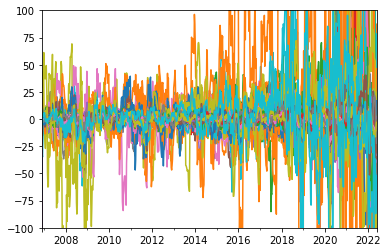

In [6]:
ax = TI_dic['MOM'].plot(legend=False)
ax.set_ylim(-100,100)

In [7]:
log_returns = log_returns[1:]
for _,TI in enumerate(TI_list) : 
    if TI not in ['BB_PERCENT','WLPR', 'ROC'] :
        TI_dic[TI] = TI_dic[TI][final_column_names]
        TI_dic[TI] = TI_dic[TI][8:]

for _,name in enumerate(FR_list) : 

        FR_dic[name] = FR_dic[name][8:]

log_returns = log_returns[8:]

In [8]:
log_returns.shape
# FR_dic['PE'].shape

(802, 220)

In [9]:
# for i,TI in enumerate(TI_list) : 

#         TI_dic[TI].replace([np.inf, -np.inf], np.nan, inplace=True)
#         drop_column_names = TI_dic[TI].columns[TI_dic[TI].isna().any()]
#         remain_column_names = TI_dic[TI].columns[~TI_dic[TI].isna().any()]
#         print(drop_column_names)

In [10]:
# # TI_dic['ROC'].plot()
# ax = FR_dic['PS'].plot(legend=False)
# ax.set_ylim(-300, 300)

In [11]:
look_back_duration = 2
look_forward = 1
n_stocks = 20
n_features = 7


In [12]:
import pandas as pd 
import numpy as np
import tensorly as tl
import plotly.express as px
import matplotlib.pyplot as plt 
from tensorly.decomposition import CP,tucker, parafac, non_negative_tucker
from datetime import timedelta, date

In [13]:
df_FR = pd.read_excel('FINANCIAL_RATIOS_NEW.xlsx', index_col =[0], skiprows=[1])

## Storing values from dataframe into a dictionary

In [14]:
# # import sys
# # import numpy as np 
# # np.set_printoptions(threshold=sys.maxsize)

# ft1 =  np.stack(FR_dic.values(), axis=2)
# ft2 = np.stack(TI_dic.values(), axis=2)
# feature_tensor = np.dstack((ft1, ft2))

# error_list = []
# for n in np.arange(1,150,2) : 
#     core, factors = tucker(feature_tensor, rank= [711,n,6])
#     pc = tl.tenalg.mode_dot(feature_tensor, factors[1].T, mode = 1)
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_tensor)/tl.norm(feature_tensor)
#     error_list.append(rec_error)
# fig, ax = plt.subplots(1)
# ax.plot(np.arange(1,150,2), error_list)
# ax.scatter(np.arange(1,150,2), error_list)
# ax.grid('On')
# ax.set_title("Reconstruction error against number of companies")
# ax.set_xlabel("Rank")
# ax.set_ylabel("Reconstruction error")



From the figure above, the reconstruction error decreases drastically initially once the rank increases above 13, the error no longer drastically anymore. We will hence select a rank of [700,18,6]

In [15]:
ft1 =  np.stack(FR_dic.values(), axis=2)
ft2 = np.stack(TI_dic.values(), axis=2)

# feature_tensor = ft2

feature_tensor = np.dstack((ft1, ft2))

# total_pc = np.zeros(shape=[2,n_stocks,n_features])
# list_of_features = [] #Split the features into different look_back_duration time slots. 

# for k in range(0,len(feature_tensor),look_back_duration): 
#     core, factors = tucker(feature_tensor[k:k+look_back_duration], rank= [2,n_stocks,n_features])
#     print(core.shape)
#     pc = tl.tenalg.mode_dot(feature_tensor[k:k+look_back_duration], factors[1].T, mode = 1)
#     print(pc.shape)
#     # print(total_pc.shape)
#     total_pc = np.vstack((total_pc,pc))
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_tensor[k:k+look_back_duration])/tl.norm(feature_tensor[k:k+look_back_duration])
#     print(rec_error)
# total_pc = total_pc[2:]


# feature_tensor = np.dstack((ft1, ft2))

def tuck_decomp(ft, t , s , f) : 

    core, factors = tucker(ft, rank= [t,s,f]) # 811 time, 20 stocks, 7 
    pc = tl.tenalg.mode_dot(ft, factors[1].T, mode = 1)
    stock_loadings = factors[1]
    rec = tl.tucker_to_tensor((core,factors))
    rec_error = tl.norm(rec - ft)/tl.norm(ft)
    print(rec_error)
    return pc, stock_loadings 


loading_len = 180
feature_loading_tensor, feature_tensor = feature_tensor[:loading_len+200], feature_tensor[loading_len:]
pc_tmp, stock_loadings = tuck_decomp(feature_loading_tensor+200, loading_len, n_stocks, n_features)


total_pc = tl.tenalg.mode_dot(feature_tensor, stock_loadings.T, mode=1) #Principal components based on loadings on the first 180 !!

print(total_pc.shape)
list_of_features = [] #Split the features into different look_back_duration time slots. 
for i in range(0,len(total_pc)-look_back_duration-look_forward+1) : 
    list_of_features.append(total_pc[i:i+look_back_duration, :,:])

c:\Users\zackx\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


0.014867139333776777
(622, 20, 7)


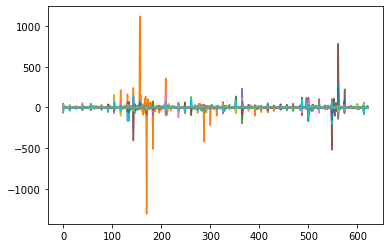

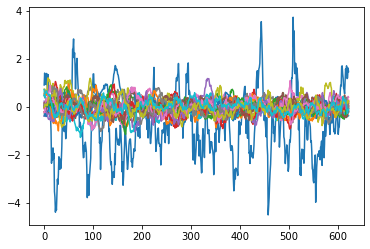

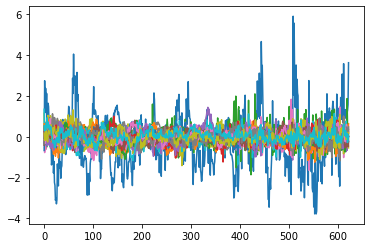

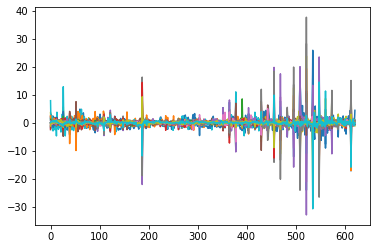

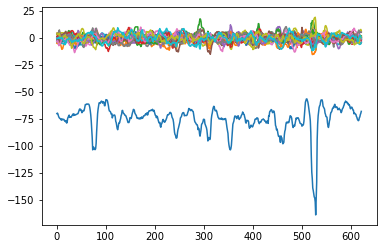

In [16]:
for i in range(5) : 
    plt.figure()
    for n in range(n_stocks) :
        plt.plot(total_pc[:,n,i])

# final_column_names

## Storing values from dataframe into a dictionary

### We attempt to predict 'test_company's' cumulative log returns 2 weeks from now based on historical data which has a lookback period of 13 weeks.


In [17]:
# # import sys
# # import numpy as np 
# # np.set_printoptions(threshold=sys.maxsize)

# ft1 =  np.stack(FR_dic.values(), axis=2)
# ft2 = np.stack(TI_dic.values(), axis=2)
# feature_tensor = np.dstack((ft1, ft2))

# error_list = []
# for n in np.arange(1,150,2) : 
#     core, factors = tucker(feature_tensor, rank= [711,n,6])
#     pc = tl.tenalg.mode_dot(feature_tensor, factors[1].T, mode = 1)
#     rec = tl.tucker_to_tensor((core,factors))
#     rec_error = tl.norm(rec - feature_tensor)/tl.norm(feature_tensor)
#     error_list.append(rec_error)
# fig, ax = plt.subplots(1)
# ax.plot(np.arange(1,150,2), error_list)
# ax.scatter(np.arange(1,150,2), error_list)
# ax.grid('On')
# ax.set_title("Reconstruction error against number of companies")
# ax.set_xlabel("Rank")
# ax.set_ylabel("Reconstruction error")



From the figure above, the reconstruction error decreases drastically initially once the rank increases above 13, the error no longer drastically anymore. We will hence select a rank of [700,18,6]

## Generate our target labels

1) Predict whether the stock will go +1 or -1 in the next 2 weeks.



In [18]:
def get_solo_features(solo_df, lb_duration, lf_duration, loading_len) :
    list_of_solo_f = []
    #SOLO FEATURES
    for i in range(0,len(solo_df)-lb_duration-lf_duration+1) : 
        list_of_solo_f.append(solo_df[i:i+lb_duration].to_numpy())
    return list_of_solo_f[loading_len:]

In [36]:
FR_dic['PE'].columns

Index(['AMAT US Equity', 'COKE US Equity', 'WDFC US Equity', 'AAPL US Equity',
       'KLAC US Equity', 'SEIC US Equity', 'AMGN US Equity', 'HCSG US Equity',
       'PAYX US Equity', 'MGRC US Equity',
       ...
       'SLB US Equity', 'MNST US Equity', 'HAL US Equity', 'NFLX US Equity',
       'ORCL US Equity', 'PG US Equity', 'TTMI US Equity', 'TTEK US Equity',
       'WFC US Equity', 'WMT US Equity'],
      dtype='object', length=125)

### GET THE RETURNS OF COMPANY X

In [37]:
#Append the training data of test company 
solo_df = pd.DataFrame()

test_company = 'SLB'
k = 0
for key,value in FR_dic.items() : 
    if k == 0 : 
        solo_df[key] = value[f'{test_company} US Equity']


for key,value in TI_dic.items() : 
    solo_df[key] = value[f'{test_company} US Equity']


for col in FR_dic['PE'] : 
    if col.startswith(test_company) : 
        y_predict = log_returns[col]

test_comp_returns = pd.DataFrame(y_predict).set_axis(['Log Returns'], axis = 1)
test_comp_returns['Cumulative Log Returns'] = test_comp_returns['Log Returns'].cumsum()

def get_n_week_retuns(log_ret, look_back_duration, lookforward, loading_len) : 
    sdate = test_comp_returns.index.values[0]
    edate = test_comp_returns.index.values[-1]
    s = (log_ret
     .reset_index()
     .iloc[look_back_duration:]
    )
    n_week_retuns = s.rolling(lookforward).sum()
    n_week_retuns.index = list(pd.date_range(sdate ,edate + pd.to_timedelta(2, unit='D') ,freq='w') - pd.to_timedelta(2, unit='D'))[:-look_back_duration]
    n_week_returns = n_week_retuns.dropna() 
    return n_week_returns


def to_simple_return(cum_log_ret) : 
    return np.exp(cum_log_ret) - 1


In [38]:
from numpy import newaxis
# x_ret_list contains the 
y_arr =  get_n_week_retuns(test_comp_returns['Log Returns'], look_back_duration, look_forward, loading_len)

y_arr[(y_arr > 0)] = 1

y_arr[y_arr <= 0] = -1

datedex = y_arr.index

y_ret = y_arr.to_numpy().flatten()




y_ret = y_ret[loading_len:]

# y_test = np.random.rand(620)
# y_test[(y_test > 0.5)] = 1

# y_test[y_test <= 0.5] = -1
# y_ret = y_test

list_of_solo_f = get_solo_features(solo_df, look_back_duration, look_forward,loading_len)
list_of_combined_features = []


for feature_t,solo_feature in zip(list_of_features,list_of_solo_f)  :
    solo_feature = solo_feature[:,newaxis,:]
    # print(feature_t.shape)
    # print(solo_feature.shape)


    tmp = np.concatenate((feature_t,solo_feature), axis=1)
    list_of_combined_features.append(tmp)


X_Cols = [tensor.flatten() for tensor in list_of_features ]

S_Cols = [mat.flatten() for mat in list_of_solo_f]

C_Cols = [tensor.flatten() for tensor in list_of_combined_features]

print(len(X_Cols))
print(len(y_ret))


# C_val, Y_val = C_Cols[-120:], y_ret[-120:]

# S_val = S_Cols[-120:]

X_Cols, S_Cols, C_Cols = X_Cols[:-120], S_Cols[:-120] , C_Cols[:-120]



# print(datedex[-120:])

620
620


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from numpy import newaxis
 

X_train, X_test, Y_train, Y_test = train_test_split(X_Cols, y_ret[:-120], random_state = 42, shuffle=False)

S_train, S_test, Y_train, Y_test = train_test_split(S_Cols, y_ret[:-120], random_state = 42, shuffle=False)

C_train, C_test, Y_train, Y_test = train_test_split(C_Cols, y_ret[:-120], random_state = 42, shuffle=False)


In [40]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, classification_report



In [41]:
# ## HYPERPARAMETER TUNING
n_estimators = [1000,2000]

max_features = ['sqrt']

max_depth = [4,5,6,7,8]

min_samples_split = [2]

min_samples_leaf = [2]

bootstrap = [False, True]


random_grid = {
    
'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap' : bootstrap

}

rf = RandomForestClassifier()

# Using 5 fold cross validation
# Search across 100 different combintations and use all available cores

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions= random_grid,
    n_iter = 50, 
    verbose= 4,
    cv = 3,
    random_state= 144,
    n_jobs = 8,
    
)

rf_random.fit(C_train, Y_train)


c:\Users\zackx\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=8,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [2],
                                        'n_estimators': [1000, 2000]},
                   random_state=144, verbose=4)

In [42]:
def baseline(Y_test, prediction) : 
    Y_test = Y_test.flatten()

    all_ones = np.ones(len(Y_test))
    all_neg_ones = np.ones(len(Y_test))* -1
    print(f"Actual number of ones : {np.count_nonzero(Y_test == 1)}")
    print(f"Predicted number of ones : {np.count_nonzero(prediction == 1)}")
    print(f"Baseline if all were ones : {np.count_nonzero((all_ones==Y_test)) / len(Y_test)}")

    print(f"Actual number of -1 : {np.count_nonzero(Y_test == -1)}")
    print(f"Predicted number of -1 : {np.count_nonzero(prediction == -1)}")
    print(f"Baseline if all were -1 : {np.count_nonzero((all_neg_ones==Y_test)) / len(Y_test)}")



In [52]:
rand_frst_S = RandomForestClassifier(n_estimators= 500, min_samples_split = 2, min_samples_leaf=2,  max_features='auto', max_depth = 3, bootstrap = True, random_state = 2)
rand_frst_S.fit(S_train,Y_train)


prediction = rand_frst_S.predict(S_train)
print(accuracy_score(Y_train, prediction))
print(confusion_matrix(Y_train, prediction))

prediction = rand_frst_S.predict(S_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

# prediction2 = rand_frst_S.predict(C_val)
# print(accuracy_score(Y_val, prediction2))
# print(confusion_matrix(Y_val, prediction2))

baseline(Y_test,prediction)


c:\Users\zackx\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7866666666666666
[[159  33]
 [ 47 136]]
0.552
[[30 37]
 [19 39]]
Actual number of ones : 58
Predicted number of ones : 76
Baseline if all were ones : 0.464
Actual number of -1 : 67
Predicted number of -1 : 49
Baseline if all were -1 : 0.536


In [62]:
rand_frst_C = RandomForestClassifier(n_estimators= 1000, min_samples_split = 2, min_samples_leaf=2,  max_features='sqrt', max_depth = 2 , bootstrap = True, random_state = 2)

rand_frst_C.fit(X_train,Y_train)


prediction = rand_frst_C.predict(X_train)
print(accuracy_score(Y_train, prediction))
print(confusion_matrix(Y_train, prediction))

prediction = rand_frst_C.predict(X_test)
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

# prediction2 = rand_frst_S.predict(C_val)
# print(accuracy_score(Y_val, prediction2))
# print(confusion_matrix(Y_val, prediction2))

baseline(Y_test,prediction)





0.816
[[166  26]
 [ 43 140]]
0.544
[[49 18]
 [39 19]]
Actual number of ones : 58
Predicted number of ones : 37
Baseline if all were ones : 0.464
Actual number of -1 : 67
Predicted number of -1 : 88
Baseline if all were -1 : 0.536


In [55]:
print('Random grid: ', random_grid, '\n')

print('Best Parameters: ', rf_random.best_params_, ' \n')

# print(rf_random.best_score_)
print(rf_random.best_params_)
target_names = ['Red', 'Green']
prediction = rf_random.predict(C_train)
print(accuracy_score(Y_train, prediction))
# print(classification_report(Y_train, prediction, target_names=target_names))
print(confusion_matrix(Y_train, prediction))


prediction = rf_random.predict(C_test)
print(accuracy_score(Y_test, prediction))
# print(classification_report(Y_test, prediction, target_names=target_names))
print(confusion_matrix(Y_test, prediction))


# prediction_val1= rf_random.predict(C_val)
# print(accuracy_score(Y_val, prediction_val1))
# print(confusion_matrix(Y_val, prediction_val1))

Random grid:  {'n_estimators': [1000, 2000], 'max_features': ['sqrt'], 'max_depth': [4, 5, 6, 7, 8], 'min_samples_split': [2], 'min_samples_leaf': [2], 'bootstrap': [False, True]} 

Best Parameters:  {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': True}  

{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': True}
1.0
[[192   0]
 [  0 183]]
0.488
[[42 25]
 [39 19]]


In [56]:
# # feature_imp = pd.Series(rf_random.best_estimator_.feature_importances_)
# feature_imp = pd.Series(rand_frst_C.feature_importances_)

# feature_imp = feature_imp.sort_values(ascending=True)
# srted_indx_list = feature_imp.index.to_list()

# col_names= ['PE', 'PX_LAST', 'PS', 'PB', 'HURST', 'MOM']
# # col_names = ['BB_PERCENT', 'HURST', 'MOM', 'ROC','RSI','WLPR']

# def get_feature_name (srted_indx_list) :
#     name_list = []
#     for num in srted_indx_list : 
#         half = len(srted_indx_list)/2 
#         if num < half : 
#             rows = num // n_features
#             cols = num % n_features

#             name = f'1.{col_names[cols]}.{rows}' 
            
#         else : 
#             rows = num // n_features - n_stocks - 1
#             cols = num % n_features
#             name = f'2.{col_names[cols]}.{rows}' 
    
#         name_list.append(name)
    
#     return name_list


# feature_imp.index = (get_feature_name(srted_indx_list) )

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(feature_imp)


        #second time frame

In [57]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(feature_imp.sort_values(ascending=False))

NameError: name 'feature_imp' is not defined

In [ ]:



# baseline(Y)

In [ ]:
# # FR_dic['PE']['AAPL US Equity'].rolling(50).mean().plot()
# # FR_dic['PE']['SLB US Equity'].rolling(50).mean().plot()
# aapl_acf = acf(FR_dic['PE']['AAPL US Equity'])
# aapl_acf_2 = acf(FR_dic['PX_LAST']['AAPL US Equity.1'])
# aapl_acf_3 = acf(FR_dic['PS']['AAPL US Equity.2'])
# aapl_acf_4 = acf(FR_dic['PB']['AAPL US Equity.3'])
# aapl_acf_5 = acf(TI_dic['HURST']['AAPL US Equity'])
# aapl_acf_6 = acf(TI_dic['HURST']['AAPL US Equity'])

# # aapl_acf_6 = acf(FR_dic['PB']['AAPL US Equity.3'])


# test_df = pd.DataFrame([aapl_acf, aapl_acf_2, aapl_acf_3, aapl_acf_4, aapl_acf_5, aapl_acf_6]).T
# test_df.columns = ['ACF of first-order difference of PE of AAPL', 'ACF of first-order difference of PX_LAST of AAPL', 
#                    'ACF of first-order difference of PS of AAPL', 'ACF of first-order difference of PB of AAPL', 'ACF of first-order difference of HURST of AAPL',
#                    'ACF of first-order difference of Momentum of AAPL'
#                   ] 
# test_df.index += 1
# test_df.plot(kind='bar', figsize=(10,7))

# plt.savefig('ACF.png')